In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [7]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

In [8]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [9]:
# meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

In [10]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [11]:
dim(pbmc)

[1] 456  64

In [12]:
# names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

In [13]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

ridgeplot

In [14]:
library(ggridges)

In [15]:
pbmc$cancergroup <- factor(pbmc$cancergroup, levels = c("Solid tumors", "Leukemia", "Lymphoma"))

In [16]:
ridgeplot.fx <- function(df, x, y, myfill, grids, myxlab){
    p <- ggplot(df, aes(x = eval(as.name(x)), y = eval(as.name(y)), fill = eval(as.name(myfill)))) +
  geom_density_ridges(alpha = 0.2, scale = 1, from = 0, to = 100) +
  theme_ridges(font_size = 13, grid = eval(grids)) + 
  theme(axis.title.y = element_blank(), legend.position = "none") + labs(x = myxlab)
  return(p)
}

In [17]:
# pTE <- ridgeplot.fx(pbmc, "percent_TE", "cycle", "cancergroup", "TRUE", "Percent TE")

In [18]:
# pEM <- ridgeplot.fx(pbmc, "percent_EM", "cycle", "cancergroup", "TRUE", "Percent EM")
# pCM <- ridgeplot.fx(pbmc, "percent_CM", "cycle", "cancergroup", "TRUE", "Percent CM")
# pSCM <- ridgeplot.fx(pbmc, "percent_SCM", "cycle", "cancergroup", "TRUE", "Percent SCM")
# pN <- ridgeplot.fx(pbmc, "percent_Naive", "cycle", "cancergroup", "TRUE", "Percent Naive")

In [19]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




In [20]:
# allp <- plot_grid(pN, pSCM, pCM, pEM, pTE, nrow = 1)

In [21]:
# pdf(paste0(plotpath, "Flow_overview.pdf"), width = 10, height = 4)
# allp
# dev.off()

one plot with facet so the plots align well

In [22]:
# melt
pbmc_m <- reshape2::melt(pbmc, id.vars = c("cancergroup", "cycle"), measure.vars = c("Naïve%", "SCM%", "CM%", "EM%", "TE%"))

In [23]:
myp <- ggplot(pbmc_m, aes(x = value, y = cycle, fill = cancergroup, point_color = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 100,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2,
    jittered_points = TRUE, point_shape = "|", point_size = 3, 
    position = position_points_jitter(height = 0)
  ) +
  geom_point(data=subset(pbmc_m, cancergroup %in% c("Lymphoma") & cycle %in% c("X04", "X05")), aes(),shape="|", size = 3) +
  theme_ridges(font_size = 13, grid = TRUE) +
  facet_wrap(~variable, nrow = 1, scales = "free_x", strip.position = "bottom") +
  theme(axis.title = element_blank(),
    legend.position = "bottom",
    strip.background.x = element_blank(),
    strip.placement = "outside"
  )


Picking joint bandwidth of 8.41

Picking joint bandwidth of 2.74

Picking joint bandwidth of 7.53

Picking joint bandwidth of 1.73

Picking joint bandwidth of 13.3



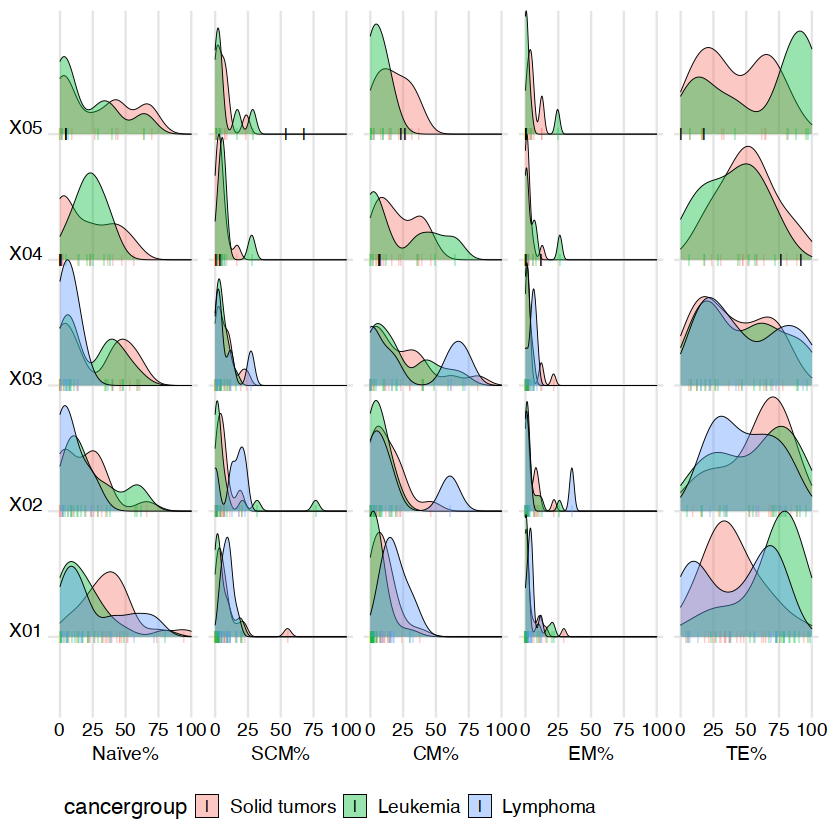

In [24]:
myp

In [25]:
pdf(paste0(plotpath, "Flow_overview.pdf"), width = 8, height = 4)
myp
dev.off()

Picking joint bandwidth of 8.41

Picking joint bandwidth of 2.74



Picking joint bandwidth of 7.53

Picking joint bandwidth of 1.73

Picking joint bandwidth of 13.3



pdf 
  2

In [26]:
library(ggh4x)
library(ggthemes)


Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map




In [27]:
pbmc_m_tcells <- pbmc_m
pbmc_m_tcells$type <- "T-cell subsets (Flow cytometry)"

In [28]:
myp <- ggplot(pbmc_m_tcells, aes(x = value, y = cycle, fill = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 100,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2,
    jittered_points = TRUE, point_shape = "|", point_size = 3,
    position = position_points_jitter(height = 0)
  ) +
  geom_point(data = subset(pbmc_m_tcells, cancergroup %in% c("Lymphoma") & cycle %in% c("X04", "X05")), aes(), shape = "|", size = 3) +
  #theme_ridges(font_size = 13, grid = TRUE) +
  facet_nested(cancergroup ~ type + variable, nest_line = element_line(linetype = 1), switch = "y", axes = "all", remove_labels = "all") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(colour = "#7f7f7f2a"),
    panel.background = element_blank(),
    panel.spacing = unit(.5, "lines"),
    #panel.border = element_rect(color = "black", fill = NA, size = 1),
    panel.border = element_blank(),

    axis.title = element_blank(),
    axis.line = element_line(),

    legend.position = "none",

    strip.background = element_blank(),
    strip.placement = "outside",
    ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3)
  )


In [29]:
pdf(paste0(plotpath, "Flow_overview_facet.pdf"), width = 10, height = 9)
myp
dev.off()

Picking joint bandwidth of 11.5

Picking joint bandwidth of 2.38

Picking joint bandwidth of 7.76

Picking joint bandwidth of 1.64

Picking joint bandwidth of 11.4

Picking joint bandwidth of 9.57

Picking joint bandwidth of 2.49

Picking joint bandwidth of 7.11

Picking joint bandwidth of 1.35

Picking joint bandwidth of 15.5

Picking joint bandwidth of 4.18

Picking joint bandwidth of 3.34

Picking joint bandwidth of 7.71

Picking joint bandwidth of 2.2

Picking joint bandwidth of 13.1



pdf 
  2

NCR

In [30]:
colnames(pbmc)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

In [31]:
# melt
pbmc_m <- reshape2::melt(pbmc, id.vars = c("cancergroup", "cycle"), measure.vars = c("PD1%", "LAG3%", "TIM3%"))

In [32]:
pbmc_m_ncr <- pbmc_m
pbmc_m_ncr$type <- "Exhaustion markers (Flow cytometry)"

for now, remove those missed entries till confirmed by DB, then add back in:

In [33]:
pbmc_m_ncr <- pbmc_m_ncr[ which(pbmc_m_ncr$value <= 100),]

In [34]:
myp <- ggplot(pbmc_m_ncr, aes(x = value, y = cycle, fill = cancergroup)) +
  geom_density_ridges(
    alpha = 0.4, from = 0, to = 100,
    scale = 1,
    panel_scaling = TRUE,
    quantile_lines = FALSE, size = 0.2,
    jittered_points = TRUE, point_shape = "|", point_size = 3,
    position = position_points_jitter(height = 0)
  ) +
  geom_point(data = subset(pbmc_m_ncr, cancergroup %in% c("Lymphoma") & cycle %in% c("X04", "X05")), aes(), shape = "|", size = 3) +
  #theme_ridges(font_size = 13, grid = TRUE) +
  facet_nested(cancergroup ~ type + variable, nest_line = element_line(linetype = 1), axes = "all", remove_labels = "all") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(colour = "#7f7f7f2a"),
    panel.background = element_blank(),
    panel.spacing = unit(.5, "lines"),
    #panel.border = element_rect(color = "black", fill = NA, size = 1),
    panel.border = element_blank(),

    axis.title = element_blank(),
    axis.line = element_line(),

    legend.position = "none",

    strip.background = element_blank(),
    strip.placement = "outside",
    strip.text.y = element_blank(),
    ggh4x.facet.nestline = element_line(colour = "black", linewidth = 0.3)
  )


In [35]:
pdf(paste0(plotpath, "NCR_overview.pdf"), width = 6, height = 9)
myp
dev.off()

Picking joint bandwidth of 4.62

Picking joint bandwidth of 4.64

Picking joint bandwidth of 4.73

Picking joint bandwidth of 6.58

Picking joint bandwidth of 4.94

Picking joint bandwidth of 6.69

Picking joint bandwidth of 10.3

Picking joint bandwidth of 5.41

Picking joint bandwidth of 10.9



pdf 
  2

stats

In [36]:
pbmc$cancergroup <- as.character(pbmc$cancergroup)

In [37]:
colnames(pbmc)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "TRB"                "Reads"             
[43] "CPKR"               "Average_reads"      "VMR"               
[46] "Max_reads"          "Singletons"         "Doubletons"        
[49] "qD"                 "Sample_Coverage"    "observed_Richness" 
[52] "estimated_Richness" "SE_Richeness"       "observed_Shannon"  
[55] "estimated_Shannon"  "SE_Shannon"         "observed_Simpson"  
[58] "estimated_Simpson"  "SE_Simpson"         "basename"          
[61] "file"               "Group"              "sampletype"        
[64] "log10shann"

In [38]:
tmp <- pbmc[ pbmc$cycle == "X02", ]

In [39]:
mytest <- "SCM%"
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Solid tumors")], tmp[[mytest]][ which(tmp$cancergroup == "Lymphoma")])
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Solid tumors")], tmp[[mytest]][ which(tmp$cancergroup == "Leukemia")])
ks.test(tmp[[mytest]][ which(tmp$cancergroup == "Lymphoma")], tmp[[mytest]][ which(tmp$cancergroup == "Leukemia")])


	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Solid tumors")] and tmp[[mytest]][which(tmp$cancergroup == "Lymphoma")]
D = 0.61667, p-value = 0.1166
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Solid tumors")] and tmp[[mytest]][which(tmp$cancergroup == "Leukemia")]
D = 0.35417, p-value = 0.2235
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cancergroup == "Lymphoma")] and tmp[[mytest]][which(tmp$cancergroup == "Leukemia")]
D = 0.5625, p-value = 0.2105
alternative hypothesis: two-sided


In [40]:
tmp <- pbmc[ pbmc$cancergroup == "Solid tumors", ]

mytest <- "TIM3%"
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X02")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X03")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X01")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X03")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X02")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X03")], tmp[[mytest]][ which(tmp$cycle == "X04")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X03")], tmp[[mytest]][ which(tmp$cycle == "X05")])
ks.test(tmp[[mytest]][ which(tmp$cycle == "X04")], tmp[[mytest]][ which(tmp$cycle == "X05")])


	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X02")]
D = 0.23443, p-value = 0.676
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X03")]
D = 0.61905, p-value = 0.001789
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.54113, p-value = 0.01477
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X01")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.69841, p-value = 0.001905
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X03")]
D = 0.56593, p-value = 0.01263
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.40559, p-value = 0.2076
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X02")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.5812, p-value = 0.03743
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X03")] and tmp[[mytest]][which(tmp$cycle == "X04")]
D = 0.27922, p-value = 0.6194
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X03")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.42063, p-value = 0.2197
alternative hypothesis: two-sided



	Exact two-sample Kolmogorov-Smirnov test

data:  tmp[[mytest]][which(tmp$cycle == "X04")] and tmp[[mytest]][which(tmp$cycle == "X05")]
D = 0.32323, p-value = 0.5866
alternative hypothesis: two-sided
